<a href="https://colab.research.google.com/github/vgorbikov/optimization_mthds/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №3. Вариант 8

## Условие

Задана модельная функция вида:
$$𝜑(𝑥_0, 𝑥_1, 𝑥_2, 𝑥_3, 𝑡) = 𝑥_3𝑡^3 + 𝑥_2𝑡^2 + 𝑥_1𝑡 + 𝑥_0$$

Целевая функция имеет вид:
$$𝐹(𝒙) = \frac{1}{2}∑_{i=1}^m 𝑓_𝑖(𝒙)^2 = \frac{1}{2}‖𝑓(𝒙)‖^2$$
где $$𝑓_𝑖(𝒙) = 𝜑(𝒙,𝑡_𝑖) − 𝑦_𝑖$$

>Методом Гаусса-Ньютона найти оптимальное значение $𝒙^∗$ с точностью $𝜀 = 0.001$.
Оценить число обусловленности матрицы Якоби для функции 𝑓(𝒙).

Начальное значение $𝒙_0 = [0.5, −4, 0, 1]$.\
Построить график модельной функции с $𝒙 = [1, −4, −1, 4]$.

## Решение

In [52]:
import autograd.numpy as np
from autograd import jacobian
from matplotlib import pyplot as plt

# подготавливаем данные
from google.colab import drive
drive.mount('/content/drive/')

with open("/content/drive/MyDrive/Colab Notebooks/optimization_mthds/lab3_var8.dat") as datfile:
  data = datfile.readlines()

  for i in range(len(data)):
    data[i] = data[i].replace('\n', '')
    data[i] = [float(symbol) for symbol in data[i].split(',')]

t_data = np.array(data[0])
y_data = np.array(data[1])

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [72]:
# условия задачи
x0 = np.array([0.5, -4, 0, 1])     # начальное значение x0
model_f = lambda x: x[3]*t_data**3 + x[2]*t_data**2 + x[1]*t_data + x[0]
EPS = 0.001

# целевая функция
target_f = lambda x: 0.5*sum((model_f(x)-y_data)**2)
jac_model = jacobian(model_f)

In [84]:
iteration_count = 0

x_min = np.copy(x0)
while True:
  iteration_count += 1

  jac_x = jac_model(x_min)
  jac_x_tpose = np.transpose(jac_x)
  x_step = np.linalg.inv(jac_x_tpose @ jac_x) @ jac_x_tpose @ (model_f(x_min)-y_data)

  norm = np.linalg.norm(x_step)

  x_min -= x_step

  if norm < EPS:
    break

print(f'Оптимальные параметры: x_min = {x_min[0], x_min[1], x_min[2], x_min[3]} \nНайдены за {iteration_count} итерации(й)')

Оптимальные параметры: x_min = (1.4750662700302333, -3.086767244966267, -1.2279518290360592, 3.725018958169772) 
Найдены за 2 итерации(й)


Модельная функция с оптимизированными параметрами. 
Занчение целевой функции: 453.26483037869235


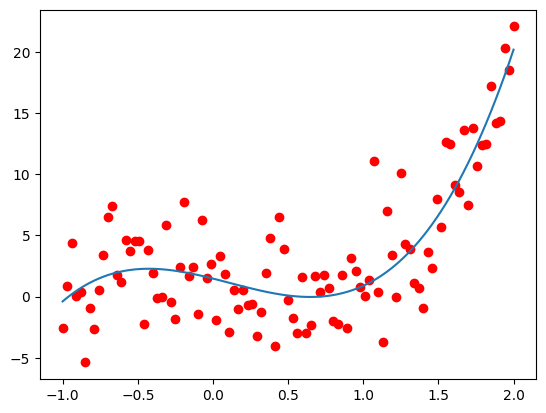

In [85]:
# график модельной функции с минимизированными параметрами
print(f'Модельная функция с оптимизированными параметрами. \nЗанчение целевой функции: {target_f(x_min)}')
plt.plot(t_data, model_f(x_min))
plt.scatter(t_data, y_data, color='red')
plt.show()

Модельная функция с параметрами x = (1, -4, -1, 4). 
Занчение целевой функции: 470.60301280497424


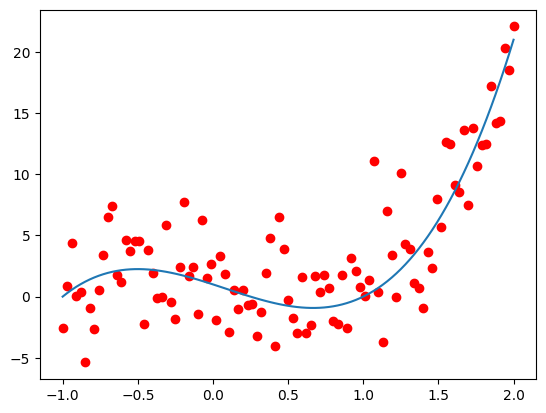

In [86]:
# график модельной функции с x0 = [1, -4, -1, 4]
x = np.array([1, -4, -1, 4])
print(f'Модельная функция с параметрами x = (1, -4, -1, 4). \nЗанчение целевой функции: {target_f(x)}')
plt.plot(t_data, model_f(x))
plt.scatter(t_data, y_data, color='red')
plt.show()